# Working with time series data - The Mauna Loa Observatory CO2 data set

This exercise is based on a tutorial published at https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3

Before you start, make sure you have installed the dependencies needed for this tutorial. The three packages you need are `pandas`, a very commonly used package for data science analyses, `matplotlib`, used for plotting (and that has a syntax similar to that of `MatLab`) and `statsmodels`, for statistical modelling, tests and data exploration.

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Don't worry if you see a warning message at this stage. It only prompts you that there will be changes to the `pandas` package in the future, and that you eventually may have to change your own code accordingly.

We’ll be working with a dataset called “Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.,” which is included in the `statsmodels` package. The dataset contains atmospheric CO2 samples from March 1958 to December 2001. Start by loading the entire dataset, and have a look at what type of object it is:

In [6]:
dataset = sm.datasets.co2.load_pandas()
type(dataset)

statsmodels.datasets.utils.Dataset

You can also explore what type of atributes this object has using the `dir()` function:

In [7]:
dir(dataset)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'clear',
 'copy',
 'data',
 'fromkeys',
 'get',
 'items',
 'keys',
 'names',
 'pop',
 'popitem',
 'raw_data',
 'setdefault',
 'update',
 'values']

More about atributes later. Now, access the co2 data by assigning the `pandas` data frame (that is part of the `dataset` object) to the variable name `co2`:

In [11]:
co2 = dataset.data

Plot data using pandas

<AxesSubplot:>

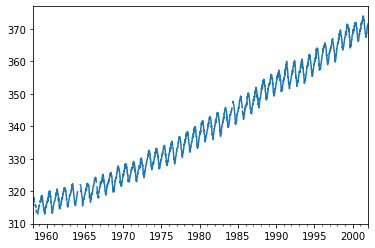

In [13]:
co2.co2.plot()

Use the `type()` and `dir()` functions to investigare the `co2` data: 

In [ ]:
# Add your code here


Similar to the `head` command in `bash`, we can use the head method of `pandas` data frames to look at subsets of our data. Here we are accessing the first five datapoints:

In [ ]:
co2.head(5)

As you can see, our data frame contains two collums. The different datapoints are indexed by the sampling dates (`1958-03-29`, `1958-04-05` etc.), stored in the first collumn, and the co2 measurments are stored in the collumn named `co2`. We can learn even more about out samples by using the `index` method.

In [ ]:
co2.index

This tells us we have 2284 `datetime` samples (the length of the data frame) and that the samples have been taken weekly on Saturdays (`freq='W-SAT'`). Let's down-sample the number of data points to only contain a monthly mean instead. The pseudocode below tries to explain how the final command in the code block is working.

In [9]:
# From dataset 'co2', 
# > co2
# access the values in the collumn 'co2',
# > co2['co2']
# and resample ...
# > co2['co2'].resample()
# ...by taking the montly ...
# > co2['co2'].resample('MS')
# ...mean value.
y = co2['co2'].resample('MS').mean()

NameError: name 'co2' is not defined

An interesting feature of pandas is its ability to handle date stamp indices, which allow us to quickly slice our data. For example, we can slice our dataset to only retrieve data points that come after the year 1990:

In [ ]:
y['1990':]

Or, we can slice our dataset to only retrieve data points between October 1995 and October 1996:

In [ ]:
y['1995-10-01':'1996-10-01']

With our data properly indexed for working with temporal data, we can move onto handling values that may be missing.

## Handling Missing Values in Time-series Data
Real world data tends be messy and it is not uncommon for time-series data to contain missing values. The simplest way to check for those is either by directly plotting the data or by using the command below that will reveal missing data in ouput:

In [8]:
y.plot(figsize=(20, 9))
plt.show()

NameError: name 'y' is not defined

As you can see, during 1958 and 1964 there are a few missing values in our dataset. We can sumarise these like this:

In [ ]:
y.isnull().sum()

This output tells us that there are 5 months with missing values in our time series.

Generally, we should “fill in” missing values if they are not too numerous so that we don’t have gaps in the data. We can do this in pandas using the `fillna()` command. For simplicity, we can fill in missing values with the closest non-null value in our time series, although it is important to note that a rolling mean would sometimes be preferable. Also note that here we are using backward fill, which means "fill missing values with the next data point in the series". Forward filling means fill missing values with the previous value in your data.

In [ ]:
y = y.fillna(y.bfill())

Now, check again if there are any remaining missing values in your dataframe.

In [ ]:
y.isnull().sum()

In [ ]:
y.plot(figsize=(20, 9))
plt.show()

## Visualizing Time-series Data
When working with time-series data, a lot can be revealed through visualizing it. A few things to look out for are:

* Seasonality: does the data display a clear periodic pattern?
* Trends: does the data follow a consistent upwards or downward slope?
* Noise: are there any outlier points or missing values that are not consistent with the rest of the data?

We can use the pandas wrapper around the matplotlib API to display a plot of our dataset:

In [ ]:
y.plot(figsize=(20, 9))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has an obvious seasonality pattern, as well as an overall increasing trend. We can also visualize our data using a method called time-series decomposition. As its name suggests, time series decomposition allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

Fortunately, statsmodels provides the convenient seasonal_decompose function to perform seasonal decomposition out of the box. 

The code below shows how to perform time-series seasonal decomposition in Python. By default, seasonal_decompose returns a figure of relatively small size, so the first two lines of this code chunk ensure that the output figure is large enough for us to visualize.

In [ ]:
from matplotlib import rcParams 
rcParams['figure.figsize'] = 15, 10

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

Note that the decomposition is done of the `pandas` time series object `y` and that the result is stored in the `DecomposeResult` object assigned to the `decomposition` variable. This object has a few atributes that we can use to access different parts of our data. 

In [ ]:
type(decomposition)

In [ ]:
dir(decomposition)

In [ ]:
type(decomposition.observed)

In [ ]:
decomposition.resid.plot()
plt.show()

### Assignment \#1 
Use the `dir()` and `type()` functions to explore the type of data, methods etc. that is available from the `decomposition` object. Then reuse the code above and make a plot of the trend between January 1984 and December 1993.

In [ ]:
# Add your code here


### Assignment \#2 
Use the downsampled data assigned to `y` and identify which meassurements are greater then 350 ppm of CO2. Then make a plot of the `trend` data that includes these datapoints.

Here I have added the first line of code needed to solve the problem. You can find more hints in the `Data_typer_Pandas.ipynb` notebook.

In [ ]:
x = y > 350.0
# Add your code here


### Assignment \#3
From the plot it is difficult to see exactly which date was the first one with a meassurements greater then 350 ppm. How would you do to extract that information from the data?

In [ ]:
# Add your code here


# Introduction to Part 2
In the previous exercise we used the Mauna Loa Observatory CO2 data set built in to the `statsmodels` module. This data only covers the period between 1958 and 2001, and is missing the last twenty years. For todays exercise you should download the full dataset covering 1958 to 2019 from ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt using the program `wget`. 

From previous courses you should be familiar with the concept of linear regression, and in the following two assignments you should compare the linear regression for the whole dataset to one covering only the last twenty years of the Mauna Loa CO2 data. Example code for doing linear regression with Pandas can be found at https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d.

### Assignment \#4 Linear regression of the whole dataset

In [ ]:
# Add code for downloading the data using `wget`. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Read the data from file. Make sure the file is licated in the same directory as your notebook. 
# Otherwise give the full path to the file.
df = pd.read_csv("co2_mm_mlo.txt", delim_whitespace=True, header=None, comment="#")

# The dataset contains a number of missing vallues represented by "-99.99". 
# We can replace these with the nearest following value (e.i. "backfill")
df = df.replace(to_replace=-99.99, method='bfill')

In [ ]:
# change name of columns
column_names = ["year","month","date","CO2_average","CO2_interpolated","Dagar","st.dev of days", "unc. of mon mean"]
df.columns = column_names

# Create a datetime
df.index = pd.to_datetime((df.year*10000+df.month*100).apply(str),format='%Y%m00')

print(df)

In [ ]:
df["CO2_average"].plot(figsize=(15, 6))
plt.show()

In [ ]:
# Extrac the two columns of data to be used for the linear regression
X = df.iloc[:, 0].values.reshape(-1, 1)
Y = df.iloc[:, 4].values.reshape(-1, 1)

In [ ]:
# Do the linear regression
# Add your code here


In [ ]:
# Plot the result in the form of a scatter plot with the estimated regression function/line
# Add your code here


In [ ]:
# Plot the value of the slope of the line
print('slope:', linear_regressor.coef_)

# Bonus: Load data directly from csv file

In [3]:
from datetime import datetime

In [4]:
df = pd.read_csv('CO2_file.csv')
df['day'] = 15
df['date'] = pd.to_datetime( df[['year', 'month','day']])
df = df.drop(columns=['date_str','year','month','day','number_days_of_data'])
df = df.set_index('date')

<AxesSubplot:xlabel='date'>

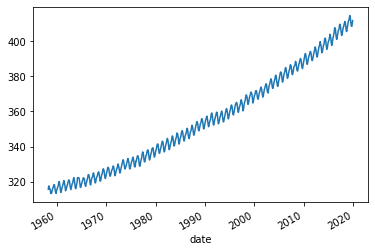

In [5]:
df.CO2_average.plot()